### Import required packages

In [1]:
# Importing important libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Importing libraries to plot visuals
import matplotlib.pyplot as plt
import plotly.express as pltx

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import various functions from statsmodel to perform linear regression
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse

#!pip install mlxtend

# 'metrics' from sklearn is used for evaluating the model performance
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importing 'warnings'
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing:

### Understand the data

In [2]:
#read the csv file
#store the dataset in df
df = pd.read_csv('Life expectancy.csv')
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62.000000,65.000000,1154,19.100000,NaN,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,NaN,65.000000
1,Albania,Developing,8,0.000000,98.000000,0,57.200000,NaN,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21.000000,95.000000,63,59.500000,NaN,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335,66.000000,64.000000,118,23.300000,NaN,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Argentina,Developing,116,8.000000,94.000000,0,62.800000,NaN,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000


In [3]:
# Use shape to check the dimensions of data
df.shape

(124, 18)

#### Interpretation: There are 18 variables and 124 obsevations.

In [4]:
#To see the number of non-null values and datatypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             124 non-null    object 
 1   Status              124 non-null    object 
 2   Adult_Mortality     124 non-null    int64  
 3   Infant_Deaths       110 non-null    float64
 4   Hepatitis           119 non-null    float64
 5   Measles             124 non-null    int64  
 6    BMI                124 non-null    float64
 7   Underfive_Deaths    119 non-null    float64
 8   Polio               124 non-null    int64  
 9   Diphtheria          124 non-null    int64  
 10   HIV                124 non-null    float64
 11  GDP                 124 non-null    float64
 12  Population          124 non-null    int64  
 13  Malnourished10_19   124 non-null    float64
 14  Malnourished5_9     124 non-null    float64
 15  Income_Index        121 non-null    float64
 16  Schoolin

In [5]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

### Descriptive Statistics:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adult_Mortality,124.000000,160.475806,101.794506,3.000000,73.500000,139.500000,234.000000,438.000000
Infant_Deaths,110.000000,28.545455,100.156267,0.000000,0.000000,4.000000,19.750000,910.000000
Hepatitis,119.000000,87.596639,24.578590,6.000000,85.000000,94.000000,97.500000,198.000000
Measles,124.000000,2841.637097,11517.586950,0.000000,0.750000,37.000000,588.750000,90387.000000
BMI,124.000000,41.733871,21.186385,2.100000,20.950000,54.100000,59.750000,71.400000
Underfive_Deaths,119.000000,43.957983,158.755563,0.000000,1.000000,7.000000,23.500000,1110.000000
Polio,124.000000,86.637097,21.653342,6.000000,88.000000,95.000000,98.000000,99.000000
Diphtheria,124.000000,87.919355,19.122879,6.000000,89.000000,95.000000,98.000000,99.000000
HIV,124.000000,0.819355,1.764127,0.100000,0.100000,0.100000,0.400000,8.100000
GDP,124.000000,6866.816502,10885.243579,5.668726,639.799727,2728.291765,8437.562893,56554.387600


## Exploratory Data Analysis (EDA):

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 16 numerical features : ['Adult_Mortality', 'Infant_Deaths', 'Hepatitis ', 'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9', 'Income_Index', 'Schooling', 'Expected']

We have 2 categorical features : ['Country', 'Status']


### Univariate Analysis

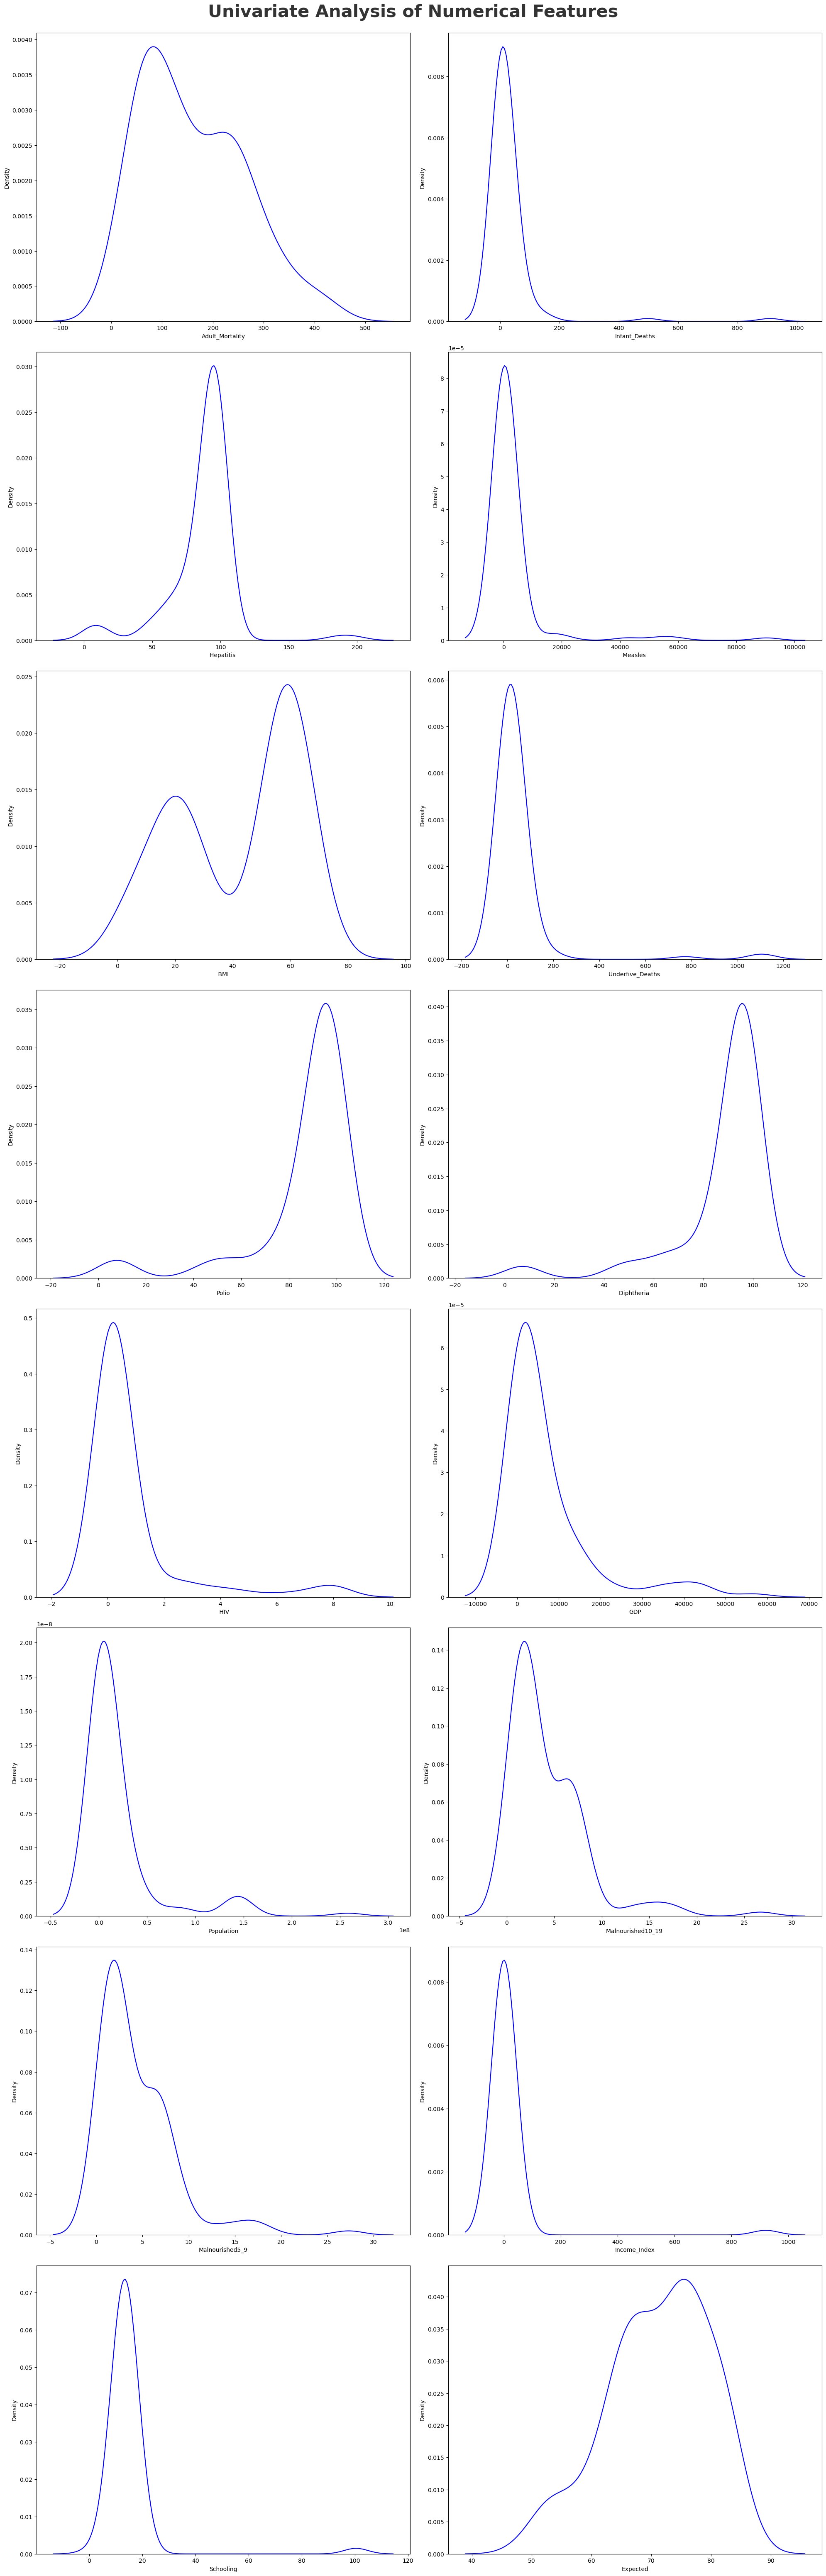

In [8]:
plt.figure(figsize=(20, 100))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=30, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(13, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

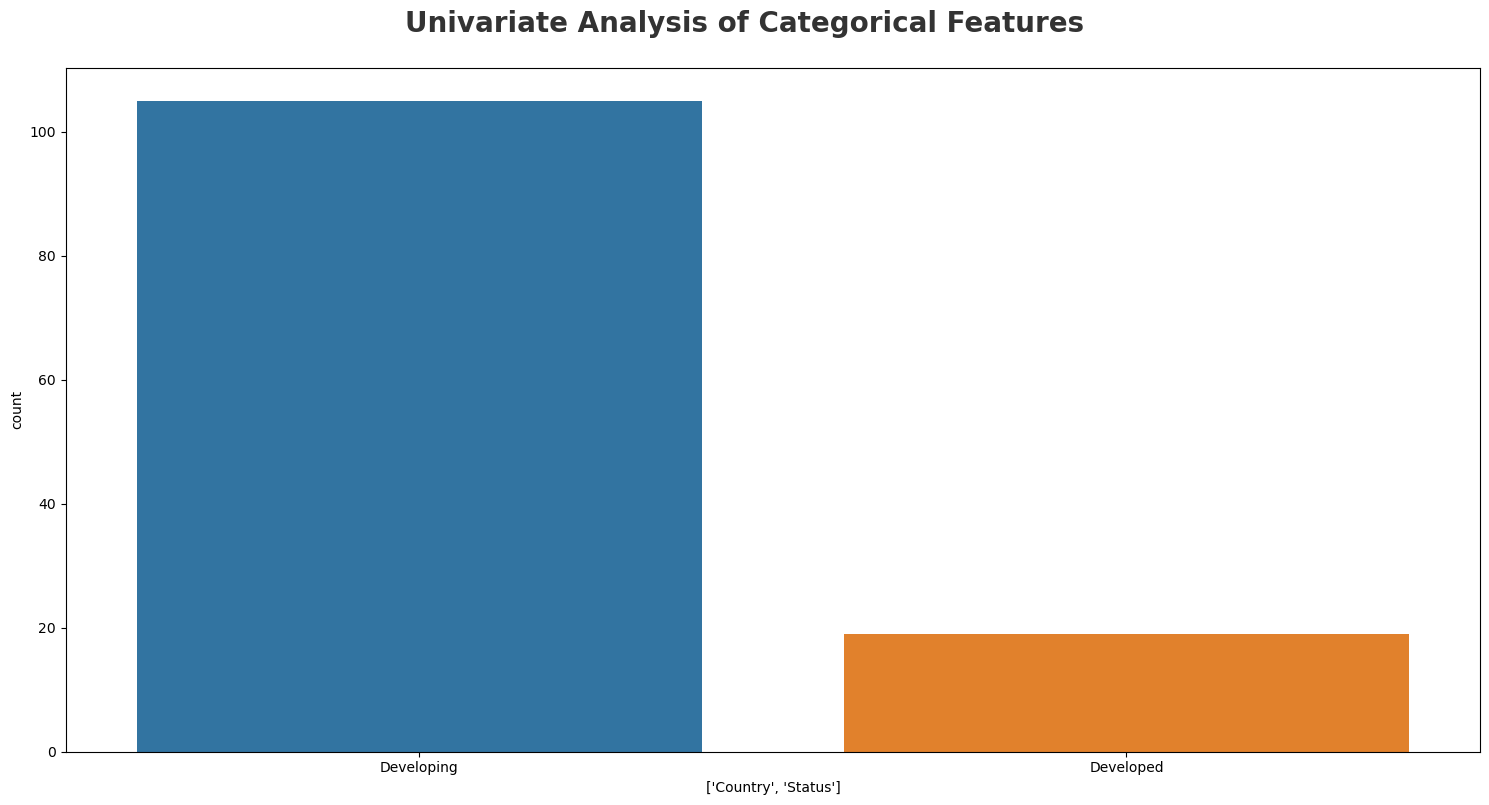

In [9]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(x=df['Status'])
plt.xlabel(categorical_features)
plt.tight_layout()

In [10]:
# Dropping the 'Country' variable
# 'axis=1' represents column
df = df.drop('Country', axis=1)

### Outliers Analysis and Treatment:

<Axes: >

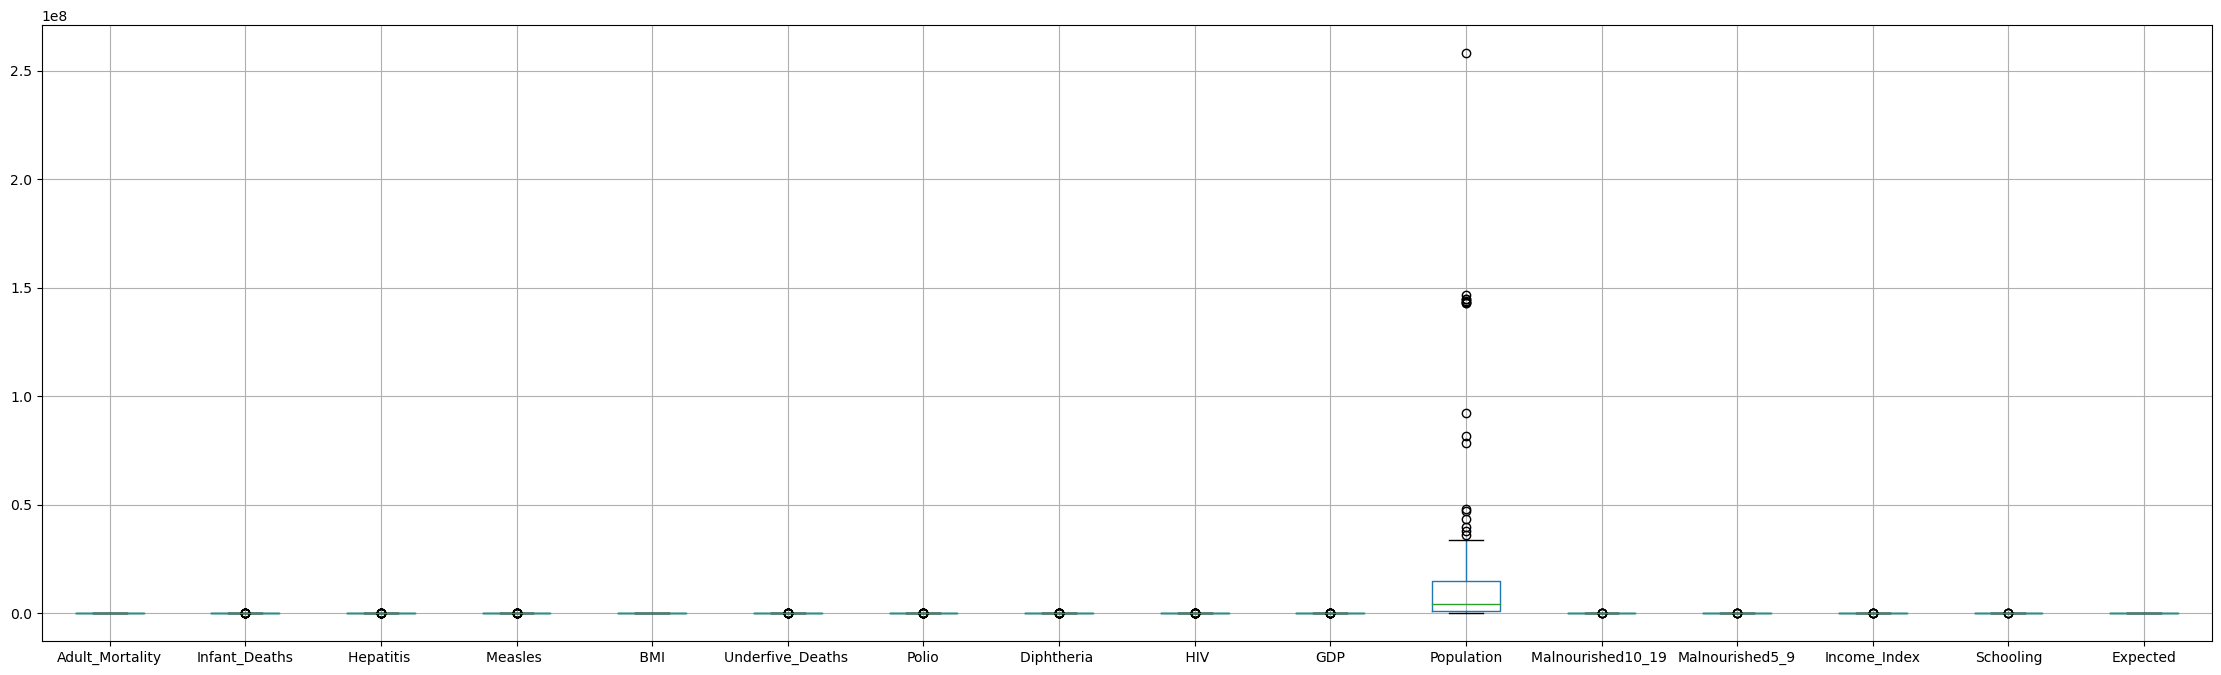

In [11]:
df.boxplot(figsize=(28,8))

#### Interpretation: Here the variables "Adult_Mortality", "BMI", "Expected" have no outliers whereas the variable "Population" has more outliers compared to other remaining variables.

In [12]:
from scipy import stats
z_scores = stats.zscore(df[['Population']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
df.shape

(116, 17)

#### Interpretation: Here we removed outliers from the variable 'Population' using z-score method.

### Junk Values Analysis and Treatment:

In [13]:
df[[' BMI ', 'Measles ']]

,BMI,Measles
0,19.100000,1154
1,57.200000,0
2,59.500000,63
3,23.300000,118
4,62.800000,0
...,...,...
119,15.400000,129
120,14.900000,386
121,14.500000,1064
122,14.100000,2738


#### Interpretation:

- If we search average BMI values for all countries, BMI value is 30. Here we have 50% of BMI values are greater than 30. Hence we can drop this column.

- Here we have 25% of junk values in Measles. So we can drop this column.

In [14]:
df = df.drop([' BMI ', 'Measles '], axis=1)

In [15]:
df['Hepatitis '].unique()

array([ 65.,  98.,  95.,  64.,  94.,  93.,  96.,  97.,  99.,  82.,  nan,
        91.,  92.,  66.,  78.,  77.,  90.,  86.,  88.,  74.,  54.,   6.,
        17.,  84.,  87.,  56.,  72.,  89.,  81.,  52.,  69.,  67.,  46.,
        55.,   8.,   9.,  43., 198., 185.])

#### Interpretation: Here we have junk values in 'Hepatitis '. So we can replace it by null values and then Imputing the null values by using KNearest Neighbours method.

### Substituting Null for values greater than 100 in variable 'Hepatitis'

In [16]:
greater_than_100 = df[(df['Hepatitis ']> 100) | (df['Hepatitis ']<0)].index
junk_vals = list(df[(df['Hepatitis ']> 100) | (df['Hepatitis ']<0)]['Hepatitis '])
print(f"{junk_vals= }")
#df_wo_null = df_wo_null.fillna(value=pd.NA, cond= Lambda x: x['Hepatitis'].isin(junk_vals))
df.loc[greater_than_100,'Hepatitis ']=pd.NA
df.loc[greater_than_100]

junk_vals= [198.0, 185.0]


,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
111,Developing,233,NaN,NaN,17.000000,98,98,0.500000,688.876856,1165151,5.900000,5.900000,0.485000,10.800000,65.200000
123,Developing,438,NaN,NaN,54.000000,76,77,8.100000,21.569654,832946,7.400000,7.500000,0.332000,100.000000,48.600000


In [17]:
df['Infant_Deaths'].unique()

array([ 62.,   0.,  21.,  66.,   8.,   1.,   5.,  92.,  25.,   2.,  42.,
        10.,  15.,  46., 157.,   6.,  51., 136.,  37.,  26.,  14., 910.,
        18.,  32.,   4.,  54.,  28.,  52.,  30.,  17.,  39.,  49., 498.,
        13.,  16.,  19.,  20.,  11.,  nan])

#### Interpretation: Here we have junk values in 'Infant_Deaths '. So we can replace it by null values and then Imputing the null values by using KNearest Neighbours method.

### Substituting Null for values greater than 100 in variable 'Infant_Deaths'

In [18]:
greater_than_100 = df[(df['Infant_Deaths']> 100) | (df['Infant_Deaths']<0)].index
junk_vals = list(df[(df['Infant_Deaths']> 100) | (df['Infant_Deaths']<0)]['Infant_Deaths'])
print(f"{junk_vals= }")
#df_wo_null = df_wo_null.fillna(value=pd.NA, cond= Lambda x: x['Infant_Deaths'].isin(junk_vals))
df.loc[greater_than_100,'Infant_Deaths']=pd.NA
df.loc[greater_than_100]

junk_vals= [157.0, 136.0, 910.0, 498.0]


,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
27,Developing,85,NaN,99.000000,183.000000,99,99,0.100000,869.211938,137122,3.600000,2.900000,0.734000,13.500000,76.100000
39,Developing,225,NaN,77.000000,194.000000,75,77,0.600000,645.463763,9987333,1.400000,1.200000,0.441000,8.400000,64.800000
52,Developing,181,NaN,87.000000,1100.000000,86,87,0.200000,1613.188780,1395398,26.700000,27.300000,0.615000,11.600000,68.300000
81,Developing,367,NaN,46.000000,773.000000,46,46,3.900000,2996.964320,17182933,1.400000,1.200000,0.514000,9.800000,53.200000


In [19]:
df['Underfive_Deaths '].unique()

array([     nan, 1.00e+00, 0.00e+00, 6.00e+00, 1.11e+03, 3.90e+01,
       2.00e+00, 4.70e+01, 1.20e+01, 2.10e+01, 7.70e+01, 1.83e+02,
       7.00e+00, 6.00e+01, 1.94e+02, 3.00e+00, 5.20e+01, 4.00e+01,
       1.80e+01, 1.10e+03, 3.80e+01, 5.00e+00, 7.50e+01, 1.10e+01,
       4.00e+00, 8.40e+01, 3.50e+01, 2.00e+01, 5.00e+01, 8.90e+01,
       7.73e+02, 1.00e+01, 6.60e+01, 6.80e+01, 1.50e+01, 1.60e+01,
       1.70e+01, 1.90e+01, 2.40e+01, 2.50e+01, 2.30e+01, 2.80e+01,
       3.00e+01, 4.60e+01, 5.40e+01])

#### Interpretation: Here we have junk values in 'Underfive_Deaths '. So we can replace it by null values and then Imputing the null values by using KNearest Neighbours method.

### Substituting Null for values greater than 100 in variable 'Underfive_Deaths'

In [20]:
greater_than_100 = df[(df['Underfive_Deaths ']> 100) | (df['Underfive_Deaths ']<0)].index
junk_vals = list(df[(df['Underfive_Deaths ']> 100) | (df['Underfive_Deaths ']<0)]['Underfive_Deaths '])
print(f"{junk_vals= }")
#df_wo_null = df_wo_null.fillna(value=pd.NA, cond= Lambda x: x['Underfive_Deaths'].isin(junk_vals))
df.loc[greater_than_100,'Underfive_Deaths ']=pd.NA
df.loc[greater_than_100]

junk_vals= [1110.0, 183.0, 194.0, 1100.0, 773.0]


,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
10,Developing,129,92.000000,97.000000,NaN,97,97,0.100000,121.158120,1612886,17.900000,18.300000,0.575000,10.200000,71.800000
27,Developing,85,NaN,99.000000,NaN,99,99,0.100000,869.211938,137122,3.600000,2.900000,0.734000,13.500000,76.100000
39,Developing,225,NaN,77.000000,NaN,75,77,0.600000,645.463763,9987333,1.400000,1.200000,0.441000,8.400000,64.800000
52,Developing,181,NaN,87.000000,NaN,86,87,0.200000,1613.188780,1395398,26.700000,27.300000,0.615000,11.600000,68.300000
81,Developing,367,NaN,46.000000,NaN,46,46,3.900000,2996.964320,17182933,1.400000,1.200000,0.514000,9.800000,53.200000


### Missing Values Analysis and Treatment:

In [21]:
df.isnull().sum().sum()

43

#### Interpretation: In this dataset, we have 43 missing values.

### Imputing Missing Values by using KNearest Neighbours

In [22]:
# Initialize KNNImputer with k=5 (you can choose a different value based on your data)
imputer = KNNImputer(n_neighbors=5)

# Define columns where you want to impute values
cols_to_impute = ['Infant_Deaths', 'Hepatitis ', 'Underfive_Deaths ', 'Income_Index', 'Schooling']

# Impute values for the specified columns
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# Save the modified DataFrame to a new CSV file
df.to_csv('Life expectancy_imputed.csv', index=False)

In [23]:
df.isnull().sum().sum()

0

#### Inetrpretation: After imputing, we have no Null Values

### Clubbing variables 'Hepatitis ', 'Polio', 'Diphtheria'

In [24]:
df['Hep/Pol/Dipth'] = (df['Hepatitis '] + df['Polio'] + df['Diphtheria ']) / 3

In [25]:
df = df.drop(['Hepatitis ', 'Polio', 'Diphtheria '], axis=1)

#### Interpretation: Here the variables 'Hepatitis', 'Polio', 'Diphtheria' are in percentage. We have clubbed those three columns by the adding and taking average and created a new column 'Hep/Pol/Dipth' and dropped those individual columns.

In [26]:
df

,Status,Adult_Mortality,Infant_Deaths,Underfive_Deaths,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected,Hep/Pol/Dipth
0,Developing,263,62.000000,62.400000,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,28.460000,65.000000,45.333333
1,Developing,8,0.000000,0.400000,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000,98.000000
2,Developing,19,21.000000,21.400000,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000,95.000000
3,Developing,335,66.000000,61.600000,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000,45.000000
4,Developing,116,8.000000,8.000000,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000,93.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Developing,37,19.400000,0.000000,7.100000,287.931877,8991735,6.800000,7.000000,0.388000,8.800000,55.300000,95.000000
120,Developing,397,1.400000,0.000000,7.700000,236.911438,8818438,6.900000,7.100000,0.371000,8.200000,53.400000,89.000000
121,Developing,48,38.800000,46.000000,8.100000,212.661949,868346,7.000000,7.300000,0.359000,7.600000,52.000000,96.000000
122,Developing,415,46.200000,50.000000,8.000000,196.597780,853625,7.200000,7.400000,0.343000,7.200000,57.000000,87.000000


### Clubbing the variables 'Malnourished5_9', 'Malnourished10_9'

In [27]:
df['Malnourished'] = (df['Malnourished10_19 '] + df['Malnourished5_9']) / 2
df = df.drop(['Malnourished10_19 ', 'Malnourished5_9'], axis=1)

#### Interpretation: Here the variables 'Malnourished10_19 ', 'Malnourished5_9' are in percentage. We have clubbed those three columns by the adding and taking average and created a new column 'Malnourished' and dropped those individual columns.

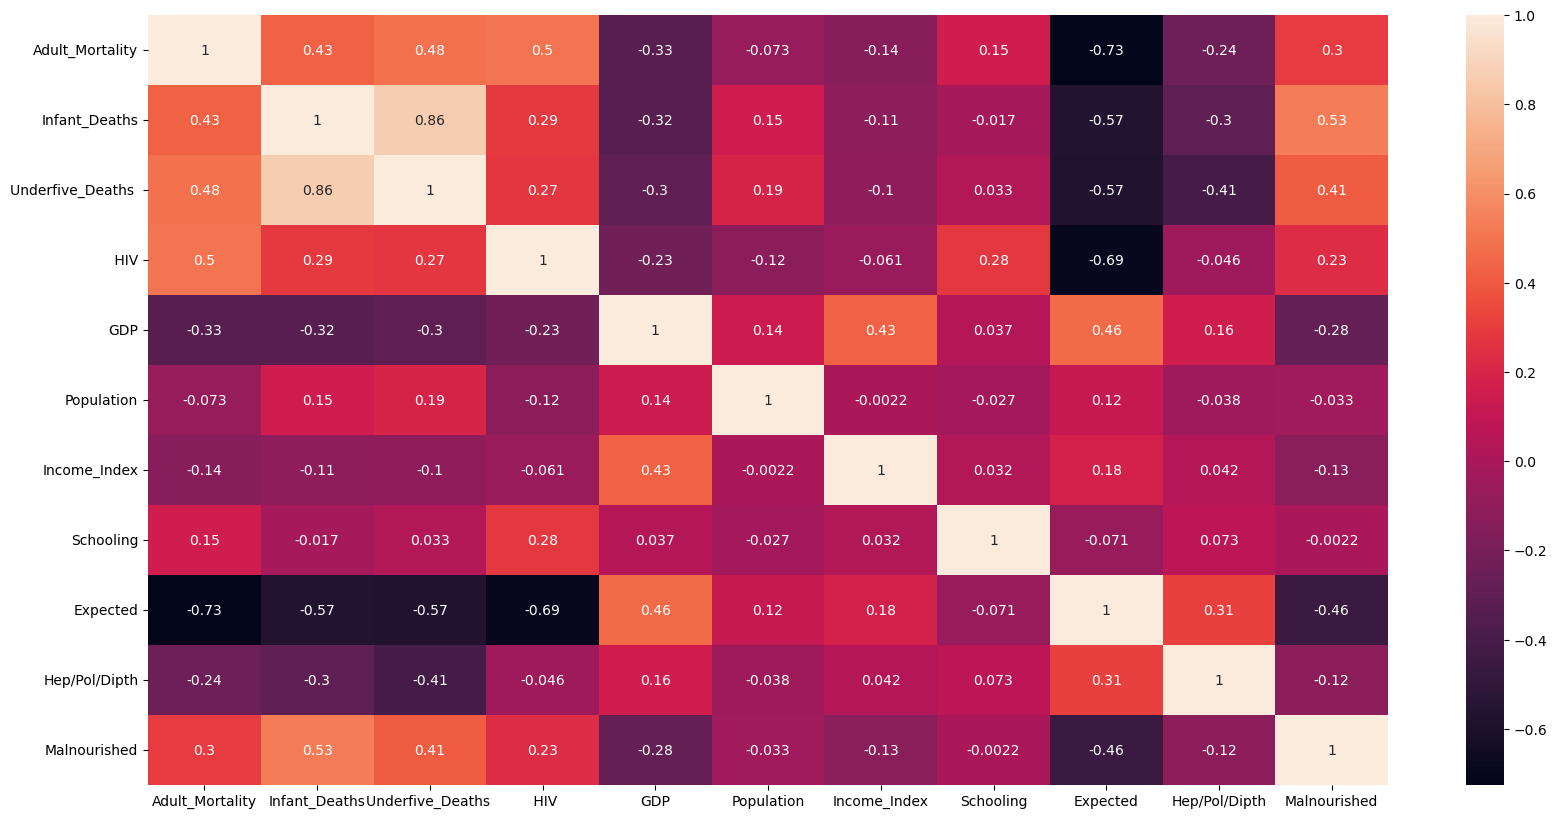

In [28]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Interpretation: There is correlation between Adult_Mortality and Expected - Negative correlation (-0.73)

## Converting Categorical data into Numerical data

### Getting the categorical data

In [29]:
df_num = df.select_dtypes(exclude='O')

### Getting the categorical data

In [30]:
df_cat = df.select_dtypes(include='O')

### Getting dummies for the categorical data

In [31]:
df_dummy = pd.get_dummies(data = df_cat, drop_first=True)

In [32]:
df_dummy.head()

,Status_Developing
0,1
1,1
2,1
3,1
4,1


### Scale the data

In [33]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

<IPython.core.display.Javascript object>

### Concatenating the variables

In [34]:
df = pd.concat([df_num, df_dummy], axis=1)

### Build Multiple linear regression Model using the OLS method

In [35]:
# Define features and target variable
features = ['Adult_Mortality', 'Infant_Deaths', 'Underfive_Deaths ', ' HIV', 'GDP',
            'Population', 'Income_Index', 'Schooling', 'Status_Developing', 'Hep/Pol/Dipth', 'Malnourished']
target = 'Expected'

In [36]:
df.columns

Index(['Adult_Mortality', 'Infant_Deaths', 'Underfive_Deaths ', ' HIV', 'GDP',
       'Population', 'Income_Index', 'Schooling', 'Expected', 'Hep/Pol/Dipth',
       'Malnourished', 'Status_Developing'],
      dtype='object')

In [37]:
X = df[features]
y = df[target]
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print dimension of train set
print('X_train_full', X_train.shape)
print('y_train_full', y_train.shape)

# print dimension of test set
print('X_test_full', X_test.shape)
print('y_test_full', y_test.shape)

X_train_full (92, 12)
y_train_full (92,)
X_test_full (24, 12)
y_test_full (24,)


In [39]:
model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(model.summary())

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     42.58
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           7.60e-29
Time:                        11:32:11   Log-Likelihood:                -244.25
No. Observations:                  92   AIC:                             512.5
Df Residuals:                      80   BIC:                             542.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.9253      2.89

In [40]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    # create a column of variable names
    vif["Features"] = df.columns

    # filter the variables with VIF greater than 5 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 5 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 5]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 5), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 5 
    if (df_sorted.empty == False):
        df = df.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor           Features
0    2.299424  Underfive_Deaths 
1    1.546177                HIV
2    1.763476                GDP
3    1.525147         Population
4    1.268189       Income_Index
5    2.336159          Schooling
6    2.717059       Malnourished
7    3.580049  Status_Developing


### Heteroskedasticity

In [41]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model along with the intercept
test = sms.het_breuschpagan(model.resid, model.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 1.4847792694980209), ('p-value', 0.153642231798734)]

#### Interpretation: Hence we observe p-value is greater than 0.05, we can conclude that there is heterskedasticity in the data.

### Visualization of residuals against predicted values

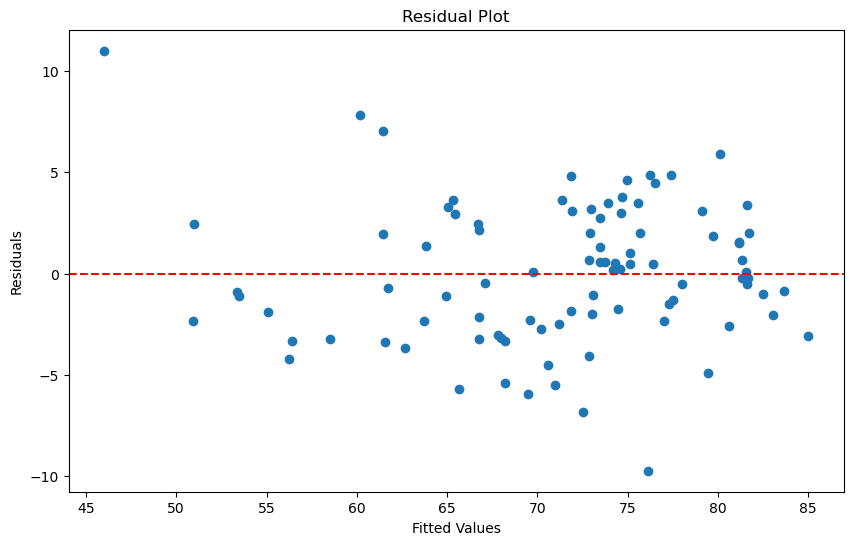

In [42]:
# Calculate residuals
residuals = model.resid

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Feature Selection using Recursive Feature Elimination(RFE)

In [43]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 5)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

<IPython.core.display.Javascript object>

Index(['Infant_Deaths', ' HIV', 'Status_Developing', 'Hep/Pol/Dipth',
       'Malnourished'],
      dtype='object')


In [44]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[signi_feat_rfe]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

<IPython.core.display.Javascript object>

0.8008659438343801

### Build model after Feature Selection

In [45]:
X = new_X_train
y = y_train
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [46]:
# Split the data into training and testing sets
X_train_featured, X_test_featured, y_train_featured, y_test_featured = train_test_split(X, y, test_size=0.2, random_state=42)

# print dimension of train set
print('X_train_featured', X_train.shape)
print('y_train_featured', y_train.shape)

# print dimension of test set
print('X_test_featured', X_test.shape)
print('y_test_featured', y_test.shape)

X_train_featured (92, 12)
y_train_featured (92,)
X_test_featured (24, 12)
y_test_featured (24,)


In [47]:
model_after_feature = sm.OLS(y_train_featured, X_train_featured).fit()

# print the summary output
print(model_after_feature.summary())

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     39.38
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.14e-18
Time:                        11:32:12   Log-Likelihood:                -210.12
No. Observations:                  73   AIC:                             432.2
Df Residuals:                      67   BIC:                             446.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.9870      3.33

# Model Performance

#### Let us do some predictions using the train and test dataset.

In [48]:
# predict the output of the target variable from the train data 
train_pred = model_after_feature.predict(X_train_featured)

# predict the output of the target variable from the test data
test_pred = model_after_feature.predict(X_test_featured)

## Mean Squared Error (MSE)

In [49]:
# calculate the MSE using the "mean_squared_error" function

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_featured, train_pred),4)

# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_featured, test_pred),4)

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  18.5219
Mean Squared Error (MSE) on test set:  7.5405


## Root Mean Squared Error (RMSE)

In [50]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train_featured, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_featured, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  4.3037
Root Mean Squared Error (RMSE) on test set:  2.746


## Mean Absolute Error (MAE)

In [51]:
# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(y_train_featured, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(y_test_featured, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  3.6644
Mean Absolute Error (MAE) on test set:  2.1388


## Mean Absolute Percentage Error (MAPE)

In [52]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [53]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train_featured, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test_featured, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  5.2956
Mean Absolute Percentage Error (MAPE) on test set:  3.1865


### Build Random Forest Model

In [54]:
df = pd.concat([df_num, df_dummy], axis=1)

In [55]:
# Define features and target variable
features = ['Adult_Mortality', 'Infant_Deaths', 'Underfive_Deaths ', ' HIV', 'GDP',
            'Population', 'Income_Index', 'Schooling', 'Status_Developing', 'Hep/Pol/Dipth', 'Malnourished']
target = 'Expected'

In [56]:
X = df[features]
y = df[target]
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print dimension of train set
print('X_train_full', X_train.shape)
print('y_train_full', y_train.shape)

# print dimension of test set
print('X_test_full', X_test.shape)
print('y_test_full', y_test.shape)

X_train_full (92, 12)
y_train_full (92,)
X_test_full (24, 12)
y_test_full (24,)


In [58]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Absolute Error: 1.81
Mean Squared Error: 6.98
R-squared Score: 0.86


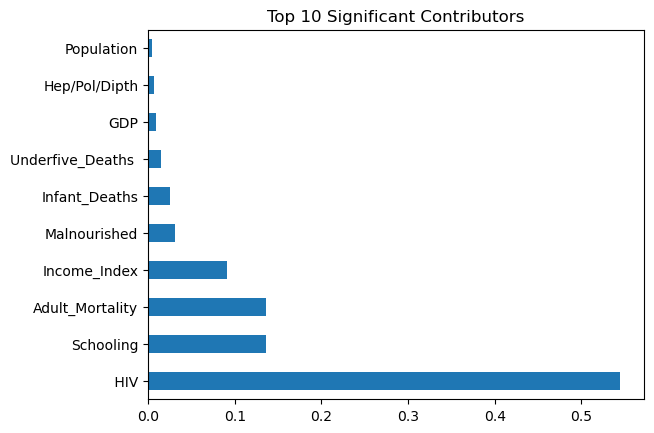

In [60]:
# Interpret model coefficients or feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Significant Contributors')
plt.show()

### Insights: Based on coefficients of the variables from the model, the above plot shows the top 10 significant contributors